# <center> Modélisation d'épidémie

# Partie I : Modèle SIR

On simule l'évolution \textbf{continue} d'une population de $N$ individus dans laquelle, à tout instant $t$, on a $S(t)$ individus sains, $I(t)$ individus infectés et $R(t)$ individus immunisés. Un individu **sain (S)** peut devenir **infecté (I)**, un individu **infecté (I)** peut devenir \textbf{immunisé (R)} et un individu **immunisé** ne peut changer d'état.


### Question 1) Modèle SIR déterministe

Dans le modèle *déterministe*, les nombres *S(t), I(t), R(t)* représentant respectivement le nombre d'individus dans les états *S, I et R* sont solutions des équations différentielles suivantes :

$$
\left\{
    \begin{array}{}
        \frac{dS(t)}{dt}&=-\frac{\beta I(t)S(t)}{N} \\
        \frac{dI(t)}{dt}&=\frac{\beta I(t)S(t)}{N}-\gamma I(t)\\
    \frac{dR(t)}{dt}&=\gamma I(t) 
    \end{array}
\right.
$$
Commentons brièvement ces équations.

* Puisque $S(t)+I(t)+R(t)=N$ alors $\frac{d}{dt}(S(t)+I(t)+R(t))=0$.

* Le nombre de personnes $S(t)$ est décroissant et que celui de personnes $R(t)$ est croissant.

* Le paramètre $\beta$ contrôle le taux d'infection i.e le taux de contagion du virus et $\gamma$ contrôle la durée de l'infection chez chaque individu.

* Le cœfficient $\frac{\beta I(t)S(t)}{N}$ traduit que l'infection évolue d'autant plus vite qu'il y a de personnes déjà infectées ou de personnes saines à contaminer à l'instant $t$.

* Le cœfficient $\gamma I(t)$ traduit que le nombre d'immunisés croît plus vite si le nombre d'infectés et donc de personnes qui peuvent potentiellement guérir est important.


On définit le rapport $\mathcal{R}_0=\frac{\beta}{\gamma}$ appelé \textbf{taux de reproduction} qui caractérise l'évolution du système (ce résultat est expliqué et illustré par la suite). Par la suite, on pourra également travailler avec les variables réduites $s_0=\frac{S_0}{N}$,$i_0=\frac{I_0}{N}$ et $r_0=\frac{R_0}{N}$ qui vérifient les mêmes équations différentielles avec des conditions initiales différentes.


**Simulons, dans un premier temps, l'évolution déterministe de la population pour des valeurs arbitraires de paramètres**

 Pour la résolution numérique, on se place dans le cas par défaut $R(0)=0$, puisque dans le cas contraire, cela revient juste à partir d'une population avec moins d'individus (les individus immunisés n'ayant aucun impact sur l'évolution de l'épidémie). Il suffit donc de choisir les paramètres $\gamma,\beta, I_0 $ et $N$. Nous avons envisagé dans un premier temps pour résoudre ce système la discrétisation du temps et le calcul de manière successive des valeurs de $S(t),I(t)$ et $R(t)$ mais nous avons finalement opté pour l'utilisation de la méthode \verb|odeint| de \verb|scipy.optimize| (la résolution par nous-même ne présentait aucune valeur ajoutée pour le sujet)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import scipy as sc
from numpy.linalg import solve
from scipy.linalg import solve_triangular
import scipy.optimize as scp
import scipy.stats as sps
from google.colab import drive
import pandas as pd

In [ ]:
## Données du problème
N = 10000       # nombre d'individus
S_0 = 8000      # nombre de personnes saines initialement
I_0 =N-S_0      # nombre d'infectés initialement       
gamma=0.1       #taux de guérison
beta=0.2        #taux d'infection

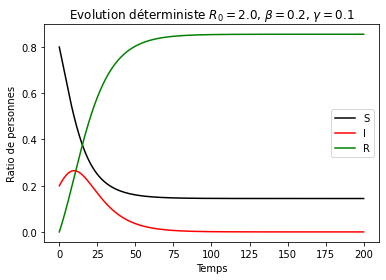

In [ ]:
t=np.linspace(0,2*10**2,10**6)      # discrétisation du temps
Y_0=S_0,I_0,0                       # état initial du système

##Résoud 
def evolution_det(Y_0,t,N,gamma,beta) :
  def deterministics(Y,t,N,gamma,beta) :
    S,I,R=Y

    dSdt = -beta*I*S/N
    dIdt = (beta*I*S/N)-gamma*I
    dRdt = gamma*I
    
    dYdt=(dSdt,dIdt,dRdt)

    return dYdt
  return odeint(deterministics,Y_0,t,args=(N,gamma,beta))

solution=evolution_det(Y_0,t,N,gamma,beta)

plt.plot(t,solution[:,0]/N, color='black',label='S')
plt.plot(t,solution[:,1]/N, color='red',label='I')
plt.plot(t,solution[:,2]/N, color='green',label='R')
plt.legend(loc='best')
plt.ylabel('Ratio de personnes')
plt.xlabel('Temps')
plt.title("Evolution déterministe "+r"$R_0=$"+str(beta/gamma)+r", $\beta=$"+str(beta)+r", $\gamma=$"+str(gamma))
plt.show()

#### **Visualisation paramètre critique $\frac{\mathcal{R}_0S_0}{N}$**




On trace pour différentes valeurs du rapport $\frac{\mathcal{R}_0S_0}{N}$, le ratio $i(t)$ de personnes infectées. On note l'apparition de la valeur critique 1 conformément au théorème 2.1 [4]

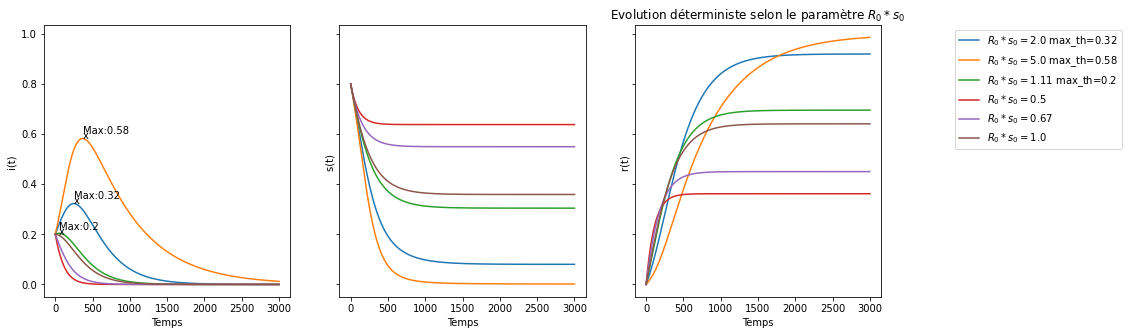

In [ ]:
N = 10000       # nombre d'individus
S_0 = 8000      # nombre de personnes saines initialement
I_0 =N-S_0  

fig,axes=plt.subplots(1,3, figsize=(15,5),sharey=True)
beta=0.01
p=beta*S_0/N
 
for gamma in [p*0.5,p*0.2,0.9*p,2*p,1.5*p,p]:

    t=np.linspace(0,3*10**3,10**7)              
    R_0=beta/gamma                              
    solution=evolution_det(Y_0,t,N,gamma,beta)    
    

    if R_0*S_0/N>1 :   # Dans ce régime le ratio de personnes infectées atteint un max
    
       max_emp=round(t[np.argmax(solution[:,1])],2),round(np.max(solution[:,1]/N),2)
       max_th=round(I_0/N+S_0/N-R_0**(-1)-R_0**(-1)*np.log(R_0*S_0/N),2)
    
       axes[0].plot(t,solution[:,1]/N,label=r'$R_0*s_0=$'+str(round((R_0*S_0)/N,2))+' max_th='+ str(max_th))
       axes[0].annotate('x',max_emp)
       axes[0].annotate('Max:'+str(max_emp[1]),(max_emp[0],max_emp[1]+0.02))
    
    else :
       axes[0].plot(t,solution[:,1]/N,label=r'$R_0*s_0=$'+str(round((R_0*S_0)/N,2)))
    
    axes[1].plot(t,solution[:,0]/N)
    axes[2].plot(t,solution[:,2]/N)



axes[0].legend(bbox_to_anchor=(4.4,1),loc='best')
axes[0].set_ylabel('i(t) ')
axes[1].set_ylabel('s(t) ')
axes[2].set_ylabel('r(t) ')
plt.setp(axes, xlabel='Temps',)
plt.title('Evolution déterministe selon le paramètre ' r'$R_0*s_0$ ')
plt.show()

On note l'apparition pour $\mathcal{R}_0$ de la **valeur critique $\dfrac{1}{s_0}$** pour l'évolution de i(t):
* Si $\mathcal{R}_0 \leqslant \dfrac{1}{s_0}$, le ratio de personnes infectées décroît vers $0$
* Si $\mathcal{R}_0 > \dfrac{1}{s_0}$, le ratio de personnes infectées croît vers $i_{max}=$ $i_0+s_0-\mathcal{R}_0^{-1}-\mathcal{R}_0^{-1}\ln(\mathcal{R}_0 s_0)$ puis décroît vers 0 où $i_0,s_0$ sont les ratios correspondants à $I_0,S_0$.

Quant à $s(t)$ et $r(t)$, leurs comportements restent globalemnt le même :

* $s(t)$ décroît strictement vers $s_{\infty}$ unique solution sur $[0,\frac{1}{\mathcal{R}_0}]$ de l'équation : $ i_0 +s_0 -s_{\infty} + \frac{\ln \left(\frac {s_{\infty}}{s_0} \right)}{\mathcal{R}_0}=0$

* $r(t)$ croît strictement vers $r_{\infty}=1-s_{\infty}$


**Traçons l'évolution de $i_{max}$ en fonction de $\mathcal{R}_0$**

Text(0, 0.5, '$i_{max}$')

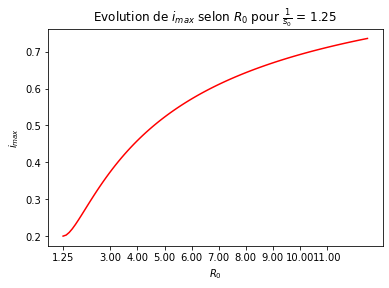

In [ ]:
s_0 = 0.8
i_0 = 1-s_0

def i_max(i_0,s_0,R_0):
  if R_0*s_0 <= 1:
    return (i_0)
  return (i_0 + s_0 - 1/R_0 - 1/R_0*np.log(R_0*s_0))

R_0= np.linspace(1/s_0,10/s_0,100)
i = []
for R in R_0:
  i.append(i_max(i_0,s_0,R))
plt.plot(R_0,i,'r',)
plt.title(r'Evolution de $i_{max}$ selon $R_0$ pour $\frac{1}{s_0}$ = ' +str(1/s_0))
plt.xlabel(r'$R_0$')
ticks=[1/s_0]+[int(x) for x in list(range(3,12))]
plt.xticks(ticks=ticks)
plt.ylabel(r'$i_{max}$')

 **$i_{max}$ croît avec $\mathcal{R}_0$** ce qui est conforme à la logique puisque la croissance de $\mathcal{R}_0$ traduit que $\beta$ (contrôle le taux d'infection) est d'autant plus grand que $\gamma$ (contrôle le taux de guérison) 

**Traçons l'évolution de $s_{\infty}$ en fonction de $\mathcal{R}_0$**

Text(0, 0.5, '$s_{\\infty}$')

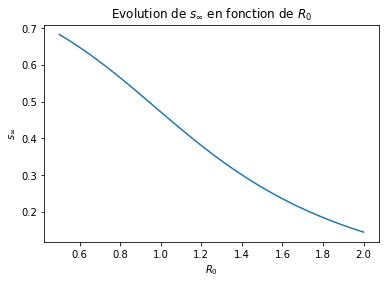

In [ ]:
from scipy.optimize import fsolve

s_0 = 0.8   
i_0 =1-s_0

def s_inf(s_0,R_0):
  i_0=1-s_0
  def f(x):
    return (i_0 + s_0 - x + np.log(x/s_0)/R_0)
  return fsolve(f,1/(2*R_0))[0]


R_0 = np.linspace(0.5,2,100)    
s = []
for R in R_0:
  s.append(s_inf(s_0,R))  
plt.plot(R_0,s)
plt.title('Evolution de $s_{\infty}$ en fonction de $R_0$')
plt.xlabel('$R_0$')
plt.ylabel('$s_{\infty}$')

### Question 2) Modèle SIR stochastique

On décide désormais, afin de tenir compte de l'aspect aléatoire des interactions des individus, de leur temps de guérison... de modéliser l'évolution de l'épidémie par une chaîne de Markov à temps continu définie par le noyau :
$$
(S,I,R) \mapsto \left\{
    \begin{array}{}
       (S-1,I+1,R)& \mbox{avec taux } \frac{\beta IS}{N}\\
        (S,I-1,R+1)& \mbox{avec taux } \gamma I\\
    \end{array}
\right.
$$
dont l'arrêt est fixé par la condition $I(t)=0$

Commentons brièvement le modèle.

* Un individu infecté passe un temps qui suit une loi $\mathcal{E}(\gamma)$ dans cet état

* Un individu sain se retrouve infecté après un temps qui suit une loi  $\mathcal{E}(\frac{\beta S}{N})$ 

* La chaîne est markovienne ce qui traduit que les temps d'infection ont une absence de mémoire. Bien que cette hypothèse puisse sembler contradictoire lorsqu'on compare à la réalité, ce modèle rejoint le modèle déterministe pour $N$ assez grand (illustré par la suite)



**Simulons ce modèle pour des valeurs arbitraires de $\beta$ et $\gamma$**

A partir d'un état $(S(t),I(t),R(t))$, pour déterminer l'état suivant, on pourrait simuler deux variables aléatoires $T_0$ et $T_1$ de lois respectives $\mathcal{E}(\frac{\beta IS}{N})$ et $\mathcal{E}(\gamma I)$. La chaîne reste alors dans cet état pendant le temps $T=\min(T_0,T_1)$ puis effectue une transition dans l'état $\mathbf{1}(T_0 > T_1)$

Toutefois, il existe une autre manière de simuler la chaîne de Markov à temps continu, tout à fait équivalente à la précédente et qui révèle des propriétés intéressantes. Avant de la présenter, démontrons le lemme suivant :

**Lemme** :Soit $T_0$ et $T_1$ deux variables aléatoires indépendantes de lois respectives $\mathcal{E}(\lambda)$ et $\mathcal{E}(\gamma)$. On sait déjà que $T:=\min(T_0,T_1)\hookrightarrow \mathcal{E}(\lambda+\gamma)$ et que $S:=\mathbf{1}(T_1>T_0)\hookrightarrow \mathcal{B}(\frac{\lambda}{\lambda+\beta})$. Montrons que $T$ et $S$  sont indépendants.

**Preuve** :
Il suffit de prouver par exemple que : $$\mathbb{E}(1(T>\alpha)\cdot 1(S=1))=\mathbb{E}(1(T>\alpha)\mathbb{E}(1(S=1))=\frac{\lambda}{\gamma+\lambda} e^{-(\lambda+\gamma)\alpha}$$

On a successivement :

$$
    \begin{array}{}
       \mathbb{E}(1(T>\alpha)\cdot 1(S=1))&=\int_0^\infty\int_0^\infty1(\min(T_0,T_1)>\alpha) 1(\mathbb{1}(T_1>T_0)=1)\lambda e^{-\lambda t_0}\gamma e^{-\gamma t_1}dt_0dt_1\\
       &=\int_0^\infty 1(t_0>\alpha) \lambda e^{-\lambda t_0}\left(\int_{t_0}^{\infty}  \gamma e^{-\gamma t_1}dt_1 \right ) dt_0\\
       &=\int_0^\infty \lambda e^{-\lambda t_0}e^{-\gamma t_0}dt_0\\
       &=\frac{\lambda}{\gamma+\lambda} e^{-(\lambda+\gamma)\alpha}
    \end{array}
$$

Ce qui prouve le résultat. 

Présentons donc la deuxième méthode de simulation qui est celle implémentée ci-dessous.

Le lemme démontré prouve qu'au lieu de simuler les deux variables aléatoires de lois exponentielles (mentionnées plus haut) puis de les comparer pour déterminer l'état suivant, on peut simuler une variable aléatoire de loi $\mathcal{E}(\frac{\beta IS}{N}+\gamma I)$ puis simuler une variable de bernoulli de paramètre $\frac{\lambda}{\lambda+\beta}$.

Ce résultat révèle qu'il n'est pas nécessaire de connaître les instants de sauts pour connaître les propriétés qui ne dépendent pas directement du temps comme l'état final du système. On peut en effet déterminer sans en connaître l'ordre, les différentes transitions réalisées.




In [ ]:
def evolution_sto(S_0,N,gamma,beta,R_0=0):

    temps_de_sauts=[0]   #Stocke les temps de sauts de la chaîne de Markov
    S,I,R=S_0,N-S_0-R_0,R_0  #état initial
    SIR=[[S,I,R]]       # Stocke les états aux instants de sauts
  
    while I>0 :  # Tant qu'il ya des infectés

      q_ii=beta*I*S/N+gamma*I  
      T=np.random.exponential(scale=1/(q_ii))   # Temps d'attente à l'état i 
      temps_de_sauts.append(T)
      
      q_i1=beta*I*S/N
      proba=q_i1/q_ii  ##Pour décider quel transition effectuée

      U=np.random.rand()      # On décide de l'état suivant
      if U<= proba :
        S,I,R=S-1,I+1,R
      else :
        S,I,R=S,I-1,R+1
      
      SIR.append([S,I,R])

    temps_de_sauts=np.cumsum(temps_de_sauts)
    return temps_de_sauts , np.array(SIR)

Illustrons maintenant l'évolution stochastique à $\mathcal{R_0}s_0$ constant pour différentes valeurs de N.

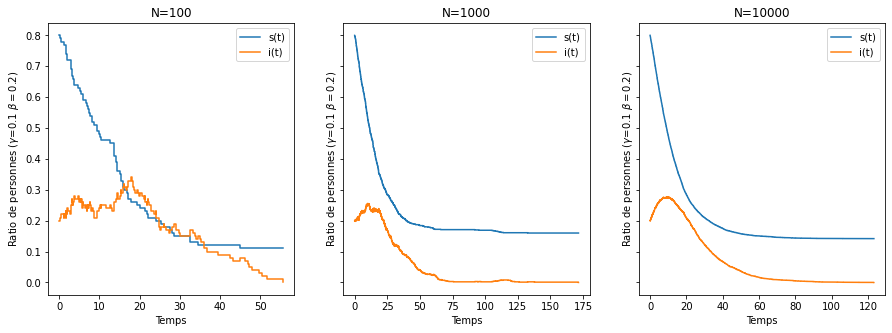

In [ ]:
gamma=0.1
beta=0.2
fig,axes=plt.subplots(1,3,sharey=True,figsize=(15,5))
for i in range (3):
  S_0=80*10**i
  N=100*10**i
  temps_de_saut,SIR_sto=evolution_sto(S_0=S_0,N=N,gamma=gamma,beta=beta)
  axes[i].step(temps_de_saut,SIR_sto[:,0]/N,where='post',label='s(t)')
  axes[i].step(temps_de_saut,SIR_sto[:,1]/N,where='post',label='i(t)')
  axes[i].set_title("N="+str(N))
  axes[i].legend(loc='best')


plt.setp(axes, xlabel='Temps',ylabel=r'Ratio de personnes'+" ($\gamma$="+str(gamma)+r" $\beta=$"+str(beta)+")")
#plt.title(r"Evolution stochastique $R_0s_0=$"+str(beta/(gamma*0.8)))
plt.show()

**Etudions les variations du système en fonction de $I_0$, $\gamma$ et $\beta$.**

#### Variation en fonction $I_0$

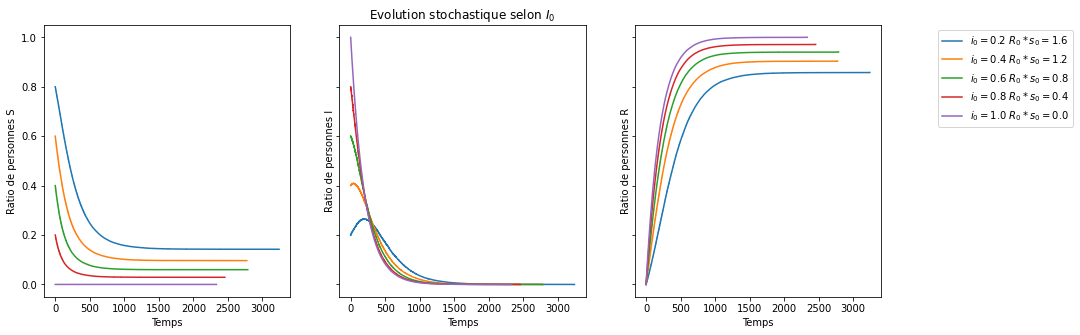

In [ ]:
N=100000
gamma=0.005
beta=0.01
typ=[' S',' I',' R']

fig,axes=plt.subplots(1,3,sharey=True,figsize=(15,5))


for I_0 in range(int(N/5),N+int(N/5),int(N/5)) :

     S_0=N-I_0
     temps_de_saut,SIR_sto=evolution_sto(S_0,N,gamma=gamma,beta=beta)
     for i in range(0,3) :
       if i==0 :
        axes[i].step(temps_de_saut,SIR_sto[:,i]/N,where='post',label=r'$i_0=$'+str(round(I_0/N,1))+r' $R_0*s_0=$'+str(round(beta*S_0/(gamma*N),2)))
       else :
        axes[i].step(temps_de_saut,SIR_sto[:,i]/N,where='post')
       axes[i].set_ylabel('Ratio de personnes'+typ[i])
       axes[i].set_xlabel('Temps')

axes[1].set_title(r'Evolution stochastique selon $I_0$',loc='center')

axes[0].legend(bbox_to_anchor=(4.2,1),loc='best')
plt.show()

#### Variantion en fonction de $\gamma$



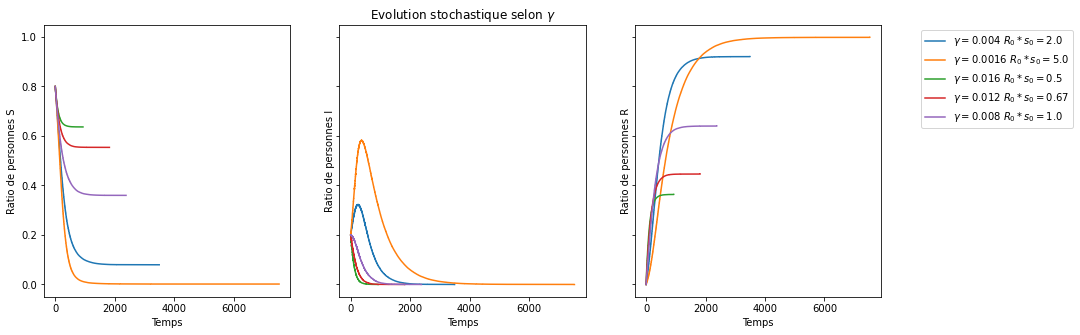

In [ ]:
N=100000
I_0=0.2*N
S_0=N-I_0
beta=0.01

typ=[' S',' I',' R']

fig,axes=plt.subplots(1,3,sharey=True,figsize=(15,5))

p=beta*S_0/N
 
for gamma in [p*0.5,p*0.2,2*p,1.5*p,p]:     #Ces valeurs permettent d'avoir des comportements différents pour I(t)

     S_0=N-I_0
     temps_de_saut,SIR_sto=evolution_sto(S_0,N,gamma=gamma,beta=beta)
     
     for i in range(0,3) :
       if i==0 :
        axes[i].step(temps_de_saut,SIR_sto[:,i]/N,where='post',label=r'$\gamma=$'+str(gamma)+' '+r'$ R_0*s_0=$'+str(round(beta*S_0/(gamma*N),2)))
       else :
        axes[i].step(temps_de_saut,SIR_sto[:,i]/N,where='post')
       axes[i].set_ylabel('Ratio de personnes'+typ[i])
       axes[i].set_xlabel('Temps')

axes[1].set_title(r'Evolution stochastique selon $\gamma$',loc='center')

axes[0].legend(bbox_to_anchor=(4.2,1),loc='best')
plt.show()

#### Variantion en fonction de $\beta$



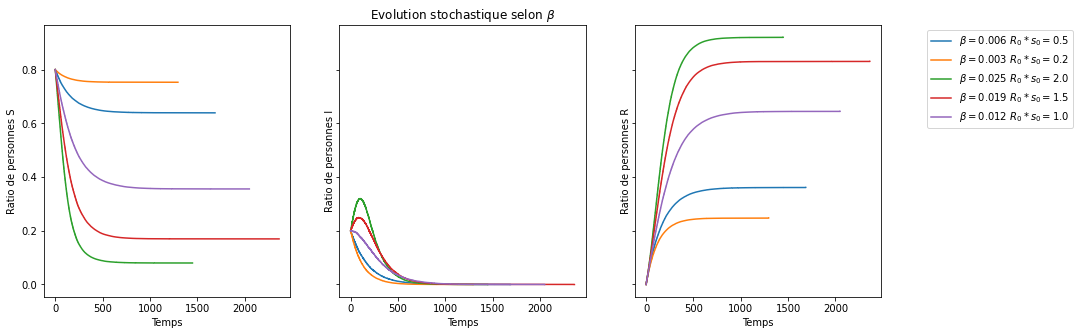

In [ ]:
N=100000
I_0=0.2*N
S_0=N-I_0
gamma=0.01

typ=[' S',' I',' R']

fig,axes=plt.subplots(1,3,sharey=True,figsize=(15,5))

p=gamma/(S_0/N)
 
for beta in [p*0.5,p*0.2,2*p,1.5*p,p]:     #Ces valeurs permettent d'avoir des comportements différents pour I(t)

     S_0=N-I_0
     temps_de_saut,SIR_sto=evolution_sto(S_0,N,gamma=gamma,beta=beta)
     
     for i in range(0,3) :
       if i==0 :
        axes[i].step(temps_de_saut,SIR_sto[:,i]/N,where='post',label=r'$\beta=$'+str(round(beta,3))+' '+ r'$ R_0*s_0=$'+str(round(beta*S_0/(gamma*N),2)))
       else :
        axes[i].step(temps_de_saut,SIR_sto[:,i]/N,where='post')
       axes[i].set_ylabel('Ratio de personnes'+typ[i])
       axes[i].set_xlabel('Temps')

axes[1].set_title(r'Evolution stochastique selon $\beta$',loc='center')
axes[0].legend(bbox_to_anchor=(4.2,1),loc='best')
plt.show()

 #### Approximation modèle probabiliste par modèle déterministe

##### Convergence uniforme sur tout compact

**Proposition :**

Sous les hyppothèses de l'énoncé $(s_N(t),i_N(t))$  converge uniformément sur tout compact vers $(s(t),i(t))$ où $(s_N(t),i_N(t))$ et $(s(t),i(t))$ sont les ratios de personnes saines et infectés respectivement dans les cas probabilistes et déterministes, et N le nombre d'invidus ( cf partie 5.5 du de l'annexe 3)

Nous allons donc tracer, à paramètre $\gamma$, $\beta$, $i_0$ fixés, l'évolution de $(s_N(t),i_N(t))$ en fonction de N




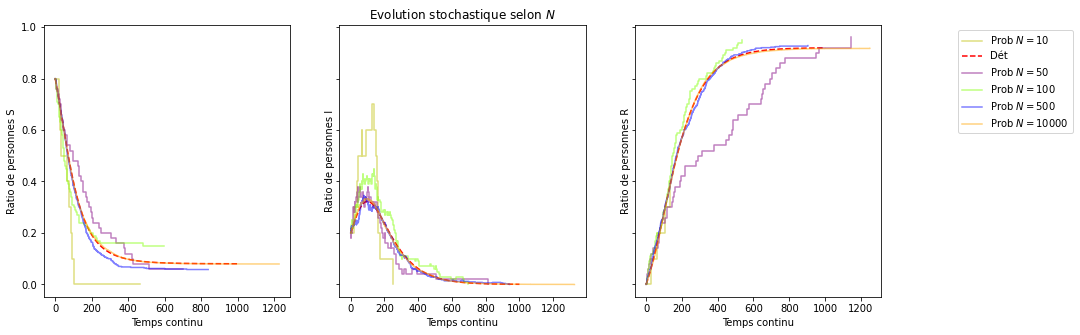

In [ ]:
t=np.linspace(0,10**3,10**7)    #abcisse pour la résolution de l'équation différentielle
gamma=0.01
p=gamma/(S_0/N)
beta=2*p

typ=[' S',' I',' R']
colors=[1,'y','b','purple','orange','chartreuse']   #utile uniquement pour la représentation graphi

fig,axes=plt.subplots(1,3,sharey=True,figsize=(15,5))

for i in range(0,3) :

  colors[0]=1 #utile uniquement pour la représentation graphique

  done=False
 
  for N in [10,50,100,500,10000]   :   #Ces valeurs permettent d'avoir des comportements différents pour I(t)
     
     I_0=0.2*N
     S_0=N-I_0
     Y_0=[S_0,I_0,0]

     temps_de_saut,SIR_sto=evolution_sto(S_0,N,gamma=gamma,beta=beta) # probabiliste
     SIR_det=evolution_det(Y_0,t,N,gamma,beta )    #Déterministe

     

     axes[i].plot(temps_de_saut,SIR_sto[:,i]/N,drawstyle='steps-post',label='Prob '+r'$N=$'+str(N),color=colors[colors[0]],alpha=0.5)
     
     if done==False : # On trace une seule fois l'évolution déterministe
        axes[i].plot(t,SIR_det[:,i]/N,label='Dét ',color='red',linestyle='dashed')
        done=True
     colors[0]=(colors[0]+1)%(len(colors)-1)+1
      
     axes[i].set_ylabel('Ratio de personnes'+typ[i])
     axes[i].set_xlabel('Temps continu')

axes[1].set_title(r'Evolution stochastique selon $N$',loc='center')
axes[0].legend(bbox_to_anchor=(4.2,1),loc='best')
plt.show()

**Conclusion** : On constate qu'en faisant croître le nombre d'invidus $N$, l'écart entre la solution déterministe et celle probabiliste se réduit ce qui confirme la proposition ci-dessus.

##### Ecart asymptotique gaussien

Dans cette même partie, nous illustrons le fait l'écart entre la solution déterministe et celle probabiliste est gaussien. Illustrons cette proposition en traçant à $t$ fixé  les écarts $\sqrt{N}(s_N(t)-s(t)$ et $\sqrt{N}(i_N(t)-i(t)$

In [ ]:
##Cette cellule prend du temps mais cela est normal

t=np.linspace(0,5*10**3,10**5)    #abcisse pour la résolution de l'équation différentielle
N=10000
I_0=0.01*N
S_0=N-I_0
gamma=0.01
p=gamma/(S_0/N)
beta=2*p


Y_0=[S_0,I_0,0]

x=100 #instant auquel on regarde

typ=['sn et s',' in et i']

ecarts=[[],[]]

for k in range (1000)  :   
     absc1=0
     absc2=0
     temps_de_saut,SIR_sto=evolution_sto(S_0,N,gamma=gamma,beta=beta) # probabiliste
     SIR_det=evolution_det(Y_0,t,N,gamma,beta )    #Déterministe
     
     for absc in range(len(temps_de_saut)) :      #Puisque les temps sont discret sur la machine 
                                                  ## nous prenons comme abcisse pour calculer l'image
                                                  ## l'abcisse discrète inférieure la plus proche
       if temps_de_saut[absc]<x : 
         absc1=absc
     for absc in range(len(t)) :
       if t[absc]<x : 
         absc2=absc

     ecarts[0].append(np.sqrt(S_0)*(SIR_sto[absc1,0]/S_0-SIR_det[absc2,0]/S_0))
     ecarts[1].append(np.sqrt(S_0)*(SIR_sto[absc1,1]/S_0-SIR_det[absc2,1]/S_0))


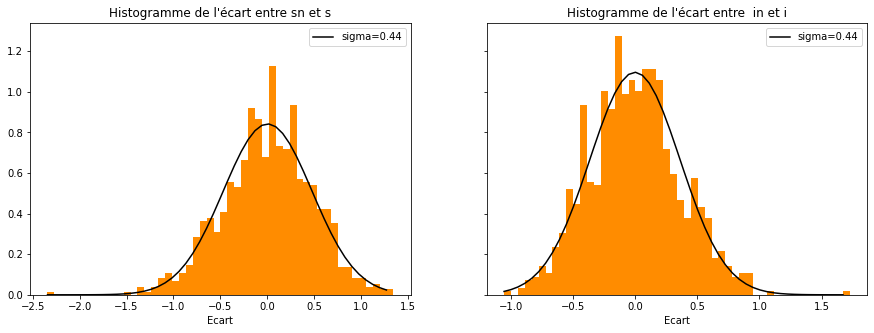

In [ ]:
fig,axes=plt.subplots(1,2,sharey=True,figsize=(15,5))

for i in range (2) :
  axes[i].hist(ecarts[i], bins=50,color='darkorange',density=True) 
  axes[i].set_xlabel('Ecart')
  axes[i].set_title("Histogramme de l'écart entre "+typ[i])

## Fit gaussian
def f(x,mu,sigma) :
  return np.exp(-(x-mu)**2/(2*sigma**2))/(np.sqrt(2*np.pi)*sigma)

hist1=np.histogram(ecarts[0],bins=50,density=True)
hist2=np.histogram(ecarts[1],bins=50,density=True)

xdata1=hist1[1][:-1]
xdata2=hist2[1][:-1]

#Estimateur de la moyenne
mean1=np.mean(ecarts[0])
mean2=np.mean(ecarts[1])

#estimateur non-biaisée de la variance
sigma1=np.sqrt((len(ecarts[0])/(len(ecarts[0])-1))*np.std(ecarts[0])**2)
sigma2=np.sqrt((len(ecarts[1])/(len(ecarts[1])-1))*np.std(ecarts[1])**2)

axes[0].plot(xdata1,f(xdata1,mean1,sigma1),color='black',label='sigma='+str(round(popt1[1],2)))
axes[1].plot(xdata2,f(xdata2,mean2,sigma2),color='black',label='sigma='+str(round(popt1[1],2)))

axes[0].legend(loc='best')
axes[1].legend(loc='best')




### Question 3)

#### Valeur théorique : $P(R(\infty)>N_0)$

Conformément au théorème 2.2 de l'annexe 3, on résoud le système triangulaire suivant :

$$\sum_{k=0}^{l}  \frac{{S_0-k \choose l-k}}{\phi \left(-\frac{\beta (S_0-l)}{S_0}\right)^{k+I_0}} P_k^{S_0} ={S_0 \choose l} $$ où :




*   $P_k^{S_0}=P(R(\infty)-I_0=k)$
*   $\phi(\theta)=\mathbb{E}(e^{\theta T})=(1-\frac{\theta}{\gamma})^{-1}$ car $T \hookrightarrow \mathcal{E}(\gamma)$ 






In [ ]:
#Transformée de laplace d'une variable de loi exponentielle
def phi(theta,gamma) :
  return (1-theta/gamma)**(-1)

# Résolution système triangulaire AX=B
def proba_th(N,gamma,beta,I_0) :  # Renvoie la probabilité X où X[k] est la proba que R_inf soit supérieure à k+I_0
      S_0=N-I_0
      A=np.zeros((S_0+1,S_0+1))
      B=np.zeros((S_0+1,1))
      for l in range (S_0+1) :
        B[l]=sc.special.comb(S_0,l,exact=True)         
        for k in range (l+1) :
          A[l][k]=sc.special.comb(S_0-k,l-k,exact=True)/phi(-(beta*(S_0-l))/S_0,gamma)**(k+I_0)
      return solve_triangular(A,B,lower=True,check_finite=True)


Text(0.5, 1.0, '$\\beta=$1.5 $\\gamma=$1 $R_0=$0 N=50 I_0=1')

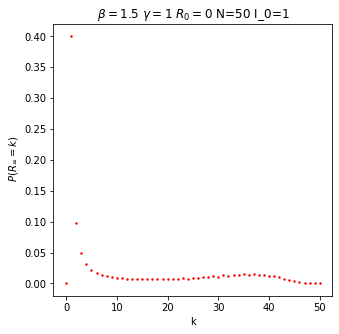

In [ ]:
#Paramètre de l'épidémie
N = 50
S_0 = 49
I_0 = N-S_0
R_0 = 0
gamma = 1
beta = 1.5

pth = proba_th(N,gamma,beta,I_0)

result=[0]*(N-S_0)+[x for x in pth]
plt.figure(figsize=(5,5))
plt.scatter(np.arange(N+1),result,s=2,color='red')
plt.ylabel(r' $P(R_\infty=k)$ ')
plt.xlabel('k')
plt.title(r'$\beta=$'+str(beta)+r' $\gamma=$'+str(gamma)+r' $R_0=$'+str(R_0)+' N='+str(N)+' I_0='+str(I_0))

Toutefois, en faisant croître la taille de la population, on note l'apparition d'erreurs numériques et de probabilités négatives. Nous estimons que cela est dû à la taille des cœfficients des matrices intervenant dans le système triangulaire (les cœfficients binomiaux sont gigantesques par exemple) puisqu'il est difficile sur Python d'effectuer des opérations arithmétiques précises sur de tels nombres. Pour palier à ce problème, nous avons pensé à des solutions telles que la transformation analytique du système triangulaire en divisant de part et d'autres par $S_0!$ afin de réduire la taille des cœfficients mais ces solutions sont demeurées insuffisantes car elles génèrent des nombres très petits qui conservent le même problème.

##Question 4) Calcul numérique et simulation d'évènements *rares*

### 1.Evaluation de $P(R(\infty)>R_{det}(\infty)+\delta)$


### Implémentation Monte Carlo Naïf

La première méthode naïve d'estimation est une méthode de Monte-Carlo classique.

On tire un nombre $n$ d'épidémie et on compte le nombre d'épidémie dépassant un certain $Seuil > R_{\infty,théorique} + \delta$

In [ ]:
def proba_MC(S_0,I_0,N,beta,gamma,Seuil,M) :
  liste_R_inf=[]
  for k in range (M):
    R_inf= evolution_sto(S_0,N,gamma,beta)[1][:,2][-1]
    liste_R_inf.append(R_inf)
  return np.mean(np.array(liste_R_inf)>Seuil)

### Implémentation IPS

 Avant de recourir à l'algorithme de sélection-mutation, transformons le problème grâce à la méthode de splitting. Afin d'évaluer la probabilité de $(S(t),I(t),R(t))\in A$, on remarque qu'en choisissant une suite décroissante de $K+1$ ensembles $(A_k)$ avec $A_K=A$.
        Soit $T_0=\inf \{t\geq 0 : C(t) \in A_0\}$ et $T_{k}=\inf \{t\geq T_{k-1} : C(t) \in A_k\}$,$\forall k\geq 1$.\\ 
        Alors,
        $$P(T_{k}\leq \mathcal{T})=\prod_{i=0}^{k-1}P(T_{i+1}\leq \mathcal{T}|T_{i}\leq \mathcal{T})$$
    
où $\mathcal{T}$ est la date d'extinction de l'épidémie.
    
    
L'algorithme de sélection-mutation permet alors de calculer chaque terme de ce produit. L'idée de l'algorithme est à partir de $n$ trajectoires de l'épidémie, sélectionner de manière itérative celles qui remplissent certaines conditions(*sélection*, dans notre cas qui vérifient $T_{k}\leq \mathcal{T}$ et de remplacer les autres par de nouvelles trajectoires (*mutation*).

In [ ]:
## IPS 
def proba_IBPS(S_0,I_0,N,beta,gamma, Seuil, nbr_traj=50000,K=40) :
  #K : nombre d'étapes de sélection
  #nbr_traj : nombre de trajectoire initial
  ## Initialisation  des trajectoires
  Traj=[]  # Stocke les trajectoires
  Temps=[]  #Stocke les temps de sauts pour chaque trajectoire
  Selection=[1] #Stocke les probabilités
  threshold=np.linspace(I_0,Seuil,K+1)
  for p in range(nbr_traj) : 
    simu=evolution_sto(S_0,N,gamma,beta)
    Traj.append(simu[1])
    Temps.append(simu[0])  
  

  for k in range (0,K+1) :
    
    #etape (a) :Sélection
    Selection_k=[]  # Stocke les indices des trajectoires sélectionnées
    for  indices in range(nbr_traj) :
      if Traj[indices][:,2][-1]>=threshold[k] :
        Selection_k.append(indices)
    
    #Si aucune particule n'a été sélectionné on recommence
    if len(Selection_k)==0 :
      return proba_IBPS(S_0,I_0,N,beta,gamma, Seuil, nbr_traj,K)

    
    #etape(b) :Mutation des éléments pas sélectionnés
    Not_select_k=[x for x in range(nbr_traj) if x not in Selection_k]

    for ind in Not_select_k:
      ##On choisit les trajectoires de remplacement de manière uniforme
      alea_ind=np.random.choice(Selection_k,size=1)[0]

      ##mutation      
      stop=0
      for position in range(len(Traj[alea_ind])) :
        if Traj[alea_ind][position][2]>threshold[k] :
          T_k=Temps[alea_ind][position]
          stop=position
          break

      simul=evolution_sto(Traj[alea_ind][stop][0],N,gamma,beta,Traj[alea_ind][stop][2])
      new_traj=[Traj[alea_ind][i] for i in range (stop+1)]
      new_time=[Temps[alea_ind][i] for i in range (stop+1)]

      ### Affectation de la nouvelle trajectoire
      for position in simul[1] :
        new_traj.append(position)
      for temp in simul[0] :
        new_time.append(temp+T_k)

      Traj[ind]=np.array(new_traj)
      Temps[ind]=new_time
      
    #etape (c) Détermination de la trajectoire conditionnelle
    Selection.append(len(Selection_k)/nbr_traj)

  return np.prod(np.array(Selection))

### 1.c) Evaluation par Importance Sampling

On effectue un changement de probabilité favorable à l'apparition de grande épidémie :

*   $\beta \rightarrow \beta_{new} > \beta$
*   $\gamma \rightarrow \gamma_{new} < \gamma$

Le rapport de vraisemblance vu en [3] à une date $t$ vaut :



> $\phi_t = \exp\Bigg(-\displaystyle \int_{O}^{t} (\beta - \beta_{new})\frac{S(s)I(s)}{N}+(\gamma-\gamma_{new})I(s)\, \mathrm{d}s \Bigg)(\frac{\beta}{\beta_{new}})^{(N(t)-R(t))}(\frac{\gamma}{\gamma_{new}})^{R(t)}$


Qui se réécrit au saut N


> $\phi_{N} = \exp\Bigg(-\sum \limits_{i=0}^N \Delta T_i[(\beta - \beta_{new})\frac{S_i I_i}{N}+(\gamma-\gamma_{new})I_i]\Bigg)(\frac{\beta}{\beta_{new}})^{(N-R_N)}(\frac{\gamma}{\gamma_{new}})^{R_N}$ 

où $\Delta T_i = T_{i+1}-T_i$ représente le temps entre deux sauts



> $P(R(\infty)>a) = \mathbb{E}_{\mathbb{P}}(\mathbb{1}_{R_T >a})=\mathbb{E}_{\mathbb{P}_{new}}(\phi_T \mathbb{1}_{R_T >a})$ avec $T$ le temps d'arrêt de fin de l'épidémie

On approche alors $P(R(\infty)>a)$ par le moment empirique $\overline{\phi^{(n)}_T \mathbb{1}_{R^{(n)}_T >a}}$




In [ ]:
def proba_IS(S_0,I_0,N,beta,gamma,beta_new,gamma_new,Seuil,M):
    p = []

    for i in range (M):
      S,I,R=S_0,I_0,0
      phi = 1
    
      while I>0 :  # Tant qu'il ya des infectés
        norm_new=beta_new*I*S/N+gamma_new*I

        proba=beta_new*I*S/N/norm_new  ##Pour décider quel transition effectuée

        T=np.random.exponential(scale=1/(norm_new))   # Temps d'attente à l'état i
        phi *= np.exp(-T*((beta-beta_new)*S*I/N+(gamma-gamma_new)*I)) #On ajuste la logvraisemblance

        U=np.random.rand()      # On décide de l'état suivant
        if U<= proba :
          S,I,R=S-1,I+1,R
          phi = phi * beta/beta_new
        else :
          S,I,R=S,I-1,R+1
          phi =phi * gamma/gamma_new
        

      p.append((R>Seuil)*phi)
    
    return np.mean(p)

En discrétisant le modèle (cf Lemme) et en faisant disparaître le paramètre temps, on peut aussi introduire la vraisemblance :


> $L_N = (\frac{\beta}{\beta_{new}})^{(N-R_N)}(\frac{\gamma}{\gamma_{new}})^{R_N}*\prod\limits_{i=0}^N\frac{\beta_{new}\frac{S_i I_i}{N}+\gamma_{new} I_i}{\beta\frac{S_i I_i}{N}+\gamma I_i}$

On a alors

> $P(R(\infty)>a) = \mathbb{E}_{\mathbb{P}}(\mathbb{1}_{R_N >a})=\mathbb{E}_{\mathbb{P}_{new}}(L_N \mathbb{1}_{R_N >a})$




In [ ]:
def proba_IS_discret(S_0,I_0,N,beta,gamma,beta_new,gamma_new,Seuil,M):
    p = []
    gamma_new = gamma

    for i in range (M):
      S,I,R=S_0,I_0,0
      phi = 1
    
      while I>0 :  # Tant qu'il ya des infectés     

        norm_new=beta_new*I*S/N+gamma_new*I
        norm = beta*I*S/N+gamma*I

        proba=beta_new*I*S/N/norm_new  ##Pour décider quel transition effectuée

        U=np.random.rand()      # On décide de l'état suivant
        if U<= proba :
          S,I,R=S-1,I+1,R
          phi = phi * beta/beta_new
        else :
          S,I,R=S,I-1,R+1
          phi =phi * gamma/gamma_new
        
        phi = phi * norm_new/norm

      p.append((R>Seuil)*phi)
    
    return np.mean(p)

Enfin, on peut ajuster les nouveaux paramètres $\beta_{new}$ et $\gamma_{new}$ à chaque étape pour essayer de minimiser la variance du nouvel estimateur en rendant l'évènement typique

In [ ]:
def r_new(S_0,N,Seuil):
  return -np.log((1-(Seuil/N))/(S_0/N))*N/R_inf

##1.b) Comparaison des trois méthodes

In [ ]:
#Paramètre de l'épidémie
N = 100
S_0 = 80
I_0 = 20
gamma = 0.1
beta = 0.1


#  definition du seuil
delta = 0.25*N
R_inf = (1-s_inf(S_0/N,beta/gamma))*N
Seuil = R_inf + delta
proba_theorique = proba_th(N,gamma,beta,I_0)[int(Seuil-I_0)]

print('Les paramètres'+'N = '+str(100)+',S_0 = '+str(80)+',I_0 = '+str(20)+',R_0 ='+str(beta/gamma)+',gamma = '+str(0.1)+',beta = '+str(0.1)+',Seuil='+str(Seuil))


Les paramètresN = 100,S_0 = 80,I_0 = 20,R_0 =1.0,gamma = 0.1,beta = 0.1,Seuil=77.83280902564782


In [ ]:
M = 100
r = r_new(S_0,N,Seuil)
proba_IS(S_0,I_0,N,beta,gamma,r*beta,gamma,Seuil,M)


3.0166072166926734e-05

Calcul du nouvel estimateur numero 1
Calcul du nouvel estimateur numero 2
Calcul du nouvel estimateur numero 3
Calcul du nouvel estimateur numero 4
Calcul du nouvel estimateur numero 5
Calcul du nouvel estimateur numero 6
Calcul du nouvel estimateur numero 7
Calcul du nouvel estimateur numero 8
Calcul du nouvel estimateur numero 9
Calcul du nouvel estimateur numero 10
Calcul du nouvel estimateur numero 11
Calcul du nouvel estimateur numero 12
Calcul du nouvel estimateur numero 13
Calcul du nouvel estimateur numero 14
Calcul du nouvel estimateur numero 15
Calcul du nouvel estimateur numero 16
Calcul du nouvel estimateur numero 17
Calcul du nouvel estimateur numero 18
Calcul du nouvel estimateur numero 19
Calcul du nouvel estimateur numero 20
Calcul du nouvel estimateur numero 21
Calcul du nouvel estimateur numero 22
Calcul du nouvel estimateur numero 23
Calcul du nouvel estimateur numero 24
Calcul du nouvel estimateur numero 25
Calcul du nouvel estimateur numero 26
Calcul du nouvel esti

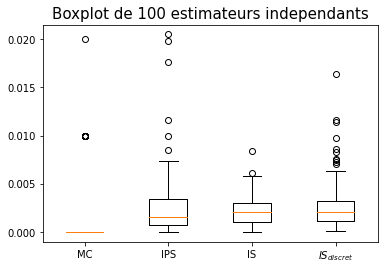

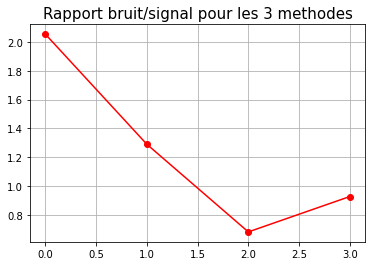

In [ ]:
NbrIter = 100
Stock = np.zeros((NbrIter, 4))
M = 100

r = r_new(S_0,N,Seuil)

for nn in range(NbrIter):
    # Pour patienter pendant la boucle qui genère les NbrIter estimateurs indep
    print("Calcul du nouvel estimateur numero "+str(nn+1))

    Stock[nn, 0] = proba_MC(S_0,I_0,N,beta,gamma,Seuil,M)
    Stock[nn, 1] = proba_IBPS(S_0,I_0,N,beta,gamma, Seuil, nbr_traj=100)
    Stock[nn, 2] = proba_IS(S_0,I_0,N,beta,gamma,1.2*beta,gamma,Seuil,M)
    Stock[nn, 3] = proba_IS_discret(S_0,I_0,N,beta,gamma,r*beta,gamma,Seuil,M)


# Comparer les boxplots des échantillons de taille NbrIter obtenus 
# pour les 3 estimateurs

plt.close(1)   
plt.figure(1)

plt.title("Boxplot de " + str(NbrIter) +" estimateurs independants", fontsize=15)
plt.boxplot(Stock[:, 0:4], positions=[1,2,3,4],
            labels = ['MC','IPS','IS','$IS_{discret}$'])

# Comparer les 3 estimateurs par le ratio "ecart-type / valeur moyenne", 
# calculé sur les échantillons de taille NbrIter
plt.close(2)
plt.figure(2)

mean_stock = np.mean(Stock, axis=0)


st_dev = np.std(Stock, axis=0)

plt.plot(st_dev/mean_stock,'r-o')
plt.title("Rapport bruit/signal pour les 3 methodes", fontsize=15)
plt.grid()

 On remarque alors que l'échantillonage d'importance (cas temps continu et discret) présente les résultats les plus prometteurs. Pour le modèle discret, on prend alors les nouveaux paramètres qui rendent l'évènement typique. Pour le modèle continu, cette méthode n'a pas fonctionné, et nous ajustons les paramètres en minimisant la variance empirique de l'estimateur du modèle à temps continu.

Toutefois, une importante contrainte computationnelle apparait :



> **Favoriser trop grossièrement l'apparition d'évènements rares fait apparaitre un facteur correctif qui dépasse la capacité de calcul de l'ordinateur**



On peut désormais essayer de trouver le changement de probabilité qui offre la plus petite variance empirique, mais le calcul est long et le résultat très aléatoire.

0 0
0 1
0 2
0 3
0 4
0 5
0 6
0 7
0 8
0 9
1 0
1 1
1 2
1 3
1 4
1 5
1 6
1 7
1 8
1 9
2 0
2 1
2 2
2 3
2 4
2 5
2 6
2 7
2 8
2 9
3 0
3 1
3 2
3 3
3 4
3 5
3 6
3 7
3 8
3 9
4 0
4 1
4 2
4 3
4 4
4 5
4 6
4 7
4 8
4 9
5 0
5 1
5 2
5 3
5 4
5 5
5 6
5 7
5 8
5 9
6 0
6 1
6 2
6 3
6 4
6 5
6 6
6 7
6 8
6 9
7 0
7 1
7 2
7 3
7 4
7 5
7 6
7 7
7 8
7 9
8 0
8 1
8 2
8 3
8 4
8 5
8 6
8 7
8 8
8 9
9 0
9 1
9 2
9 3
9 4
9 5
9 6
9 7
9 8
9 9


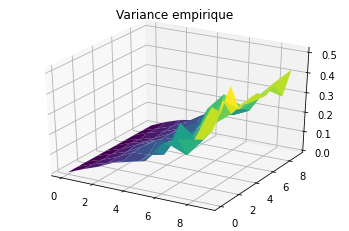

In [ ]:
NbrIter = 50
N = 10
Stock = np.zeros((NbrIter, N,N))
M = 50

beta_new = np.linspace(beta,1.5*beta,N)
gamma_new = np.linspace(0.5*gamma,gamma,N)


for i in range (N):
  for j in range (N):
    print(i,j)
    for nn in range(NbrIter):

        Stock[nn, i,j] = proba_IS_discret(S_0,I_0,N,beta,gamma,beta_new[i],gamma_new[j],Seuil,M)

X,Y = np.meshgrid(np.arange(0,N),np.arange(0,N))
st_dev = np.std(Stock, axis=0)

ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, st_dev[X,Y], rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_title('Variance empirique');

##2.Evaluation de $P(I_{max}>I_{max,det}+\delta)$

Importance Sampling vs MonteCarlo


Calcul du nouvel estimateur numero 1
Calcul du nouvel estimateur numero 2
Calcul du nouvel estimateur numero 3
Calcul du nouvel estimateur numero 4
Calcul du nouvel estimateur numero 5
Calcul du nouvel estimateur numero 6
Calcul du nouvel estimateur numero 7
Calcul du nouvel estimateur numero 8
Calcul du nouvel estimateur numero 9
Calcul du nouvel estimateur numero 10
Calcul du nouvel estimateur numero 11
Calcul du nouvel estimateur numero 12
Calcul du nouvel estimateur numero 13
Calcul du nouvel estimateur numero 14
Calcul du nouvel estimateur numero 15
Calcul du nouvel estimateur numero 16
Calcul du nouvel estimateur numero 17
Calcul du nouvel estimateur numero 18
Calcul du nouvel estimateur numero 19
Calcul du nouvel estimateur numero 20
Calcul du nouvel estimateur numero 21
Calcul du nouvel estimateur numero 22
Calcul du nouvel estimateur numero 23
Calcul du nouvel estimateur numero 24
Calcul du nouvel estimateur numero 25
Calcul du nouvel estimateur numero 26
Calcul du nouvel esti

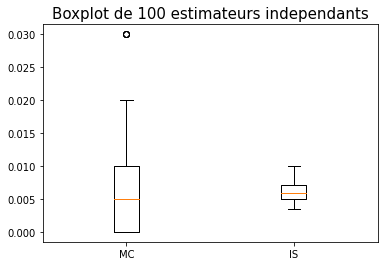

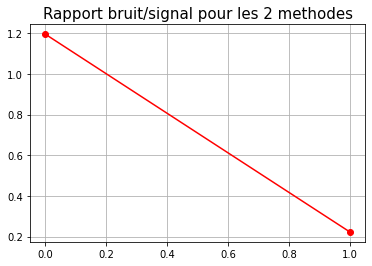

In [ ]:
#Paramètre de l'épidémie
N = 100
S_0 = 80
I_0 = 20
R_0 = 0
gamma = 0.1
beta = 0.2

#  definition du seuil
delta = 0.2*N
I_max = i_max(I_0/N,S_0/N,beta/gamma)*N
Seuil = I_max+delta

def proba_IS_discret_I(gamma_new,beta_new,M):
    p = []
    for i in range (M):
      S,I,R=S_0,I_0,0
      phi = 1
    
      while I<Seuil and I>0:  # Tant qu'il ya des infectés      
        
        norm_new=beta_new*I*S/N+gamma_new*I
        norm = beta*I*S/N+gamma*I

        proba=beta_new*I*S/N/norm_new  ##Pour décider quel transition effectuée

        U=np.random.rand()      # On décide de l'état suivant
        if U<= proba :
          S,I,R=S-1,I+1,R
          phi = phi * beta/beta_new
        else :
          S,I,R=S,I-1,R+1
          phi =phi * gamma/gamma_new
        
        phi = phi * norm_new/norm

      p.append((I>=Seuil)*phi)
    
    return np.mean(p)


NbrIter = 100
Stock = np.zeros((NbrIter, 2))
M = 100

for nn in range(NbrIter):
    # Pour patienter pendant la boucle qui genère les NbrIter estimateurs indep
    print("Calcul du nouvel estimateur numero "+str(nn+1))

    Stock[nn, 0] = proba_IS_discret_I(gamma,beta,M)
    Stock[nn, 1] = proba_IS_discret_I(0.8*gamma,1.2*beta,M)


# Comparer les boxplots des échantillons de taille NbrIter obtenus 
# pour les 3 estimateurs

plt.close(1)   
plt.figure(1)

plt.title("Boxplot de " + str(NbrIter) +" estimateurs independants", fontsize=15)
plt.boxplot(Stock[:, 0:2], positions=[1,2],
            labels = ['MC','IS'])

# Comparer les 3 estimateurs par le ratio "ecart-type / valeur moyenne", 
# calculé sur les échantillons de taille NbrIter
plt.close(2)
plt.figure(2)

mean_stock = np.mean(Stock, axis=0)


st_dev = np.std(Stock, axis=0)

plt.plot(st_dev/mean_stock,'r-o')
plt.title("Rapport bruit/signal pour les 2 methodes", fontsize=15)
plt.grid()

##Bonus : Modèle de Selke [2]

In [ ]:
M = 10000

def Selke(n,m,rho,M):
  r = np.cumsum(np.random.exponential(1/rho, (m+n,M)),axis = 0)
  l = np.sort(np.random.exponential(1,(n,M)),0)
  diff = l-r[m:,:]
  return(np.sum(diff>0,axis = 0))

On peut alors expérimenter le très beau résultat de convergence suivant :



*   si $n_k \rightarrow \infty$  
*   si $\rho_k \rightarrow \infty$
*   et si $n_k exp(- \frac{n_k+m_k}{\rho_k})\rightarrow \lambda$

Alors $S_k\overset{\mathcal{L}}{\longrightarrow} 	\mathcal{P}(\lambda)$












In [ ]:
import scipy.stats as scs

b = 5
k = 1000

n_k = k
m_k = int(0.2*k)
rho_k = 1.2*k/np.log(k/b)

plt.title('Repartition statistique du nombre final de survivants')
plt.xlabel('Nombre de survivants')
plt.ylabel('Probabilite')

x = np.arange(int(3*b))
poisson = scs.poisson.pmf(b,x)
plt.hist(Selke(n_k,m_k,rho_k,M), bins = x-0.1, rwidth = 0.1, density = True, color = 'r', label = 'empirique')
plt.bar(x+0.1,poisson, width = 0.1, color = 'g', label = 'limite')
plt.legend()



On peut essayer de retrouver le paramètre b avec un estimateur de maximum de vraisemblance d'une loi de Poisson : 

> $\widehat{\lambda_{MV}} = \frac{\sum_{i=1}^{M} X_k^{(i)}}{M}$



In [ ]:
b = 5
k = 1000
N_simul = 100
M = 100

n_k = k
m_k = int(0.2*k)
rho_k = 1.2*k/np.log(k/b)

repartition = []

for i in range (N_simul):
  repartition.append(np.sum(Selke(n_k,m_k,rho_k,M))/M)

plt.title('Estimation du paramètre $\lambda$')
plt.hist(repartition, color = 'r', label = '$\widehat{\lambda_{MV}}$')
plt.axvline(x=b, label = '$\lambda$')
plt.legend()

## Comparaison à des données réelles et estimation paramétrique : Covid 19

In [ ]:
drive.mount('/content/drive/')
##Pour faire marcher la cellule, veuillez 
##commenter la ligne ci -dessus
##remplacer folder par l'adresse  à laquelle vous stockez les fichiers csv que nous avons joint au notebook
folder = 'drive/My Drive/MODAL/'

In [ ]:

df_global = pd.read_csv(folder+'coronavirus.politologue.com-global-2020-05-08.csv', sep = ';', header = 0, parse_dates = True, index_col = 'Date').sort_index()
df_pays = pd.read_csv(folder+'coronavirus.politologue.com-pays-2020-05-08.csv', sep = ';', header = 0, parse_dates = True, index_col = 'Date').sort_index()
df_FR = df_pays[df_pays.Pays=='France']

param = ['TauxDeces','TauxGuerison','TauxInfection']
stats = ['Infections','Guerisons','Deces']

#----------------------------------------------------------------------------------------------------------------------------------

fig, axes = plt.subplots(figsize=(20, 10), nrows=2, ncols=2, sharex = True)
plt.gcf().subplots_adjust(wspace = 0.2, hspace = 0.2)

df_global[stats].plot(ax=axes[0,0])
axes[0,0].set_title('Statistiques mondiales')

df_global[param].plot(ax=axes[0,1])
axes[0,1].set_title('Paramètres mondiaux')

df_FR[stats].plot(ax=axes[1,0])
axes[1,0].set_title('Statistiques France')

df_FR[param].plot(ax=axes[1,1])
axes[1,1].set_title('Paramètres France')


On adapte le modèle SIR à une version discrète analogue à un modèle de naissance-mort, ou chaque jour correspond à une génération

Etant donné la génération $(S_k, I_k, R_k)$, on tire la génération suivante :

  \begin{array}{ll}
    S_{k+1} = S_k - \sum_{i=0}^{I_k} X_i^{(k)}\\
    I_{k+1} = I_k + \sum_{i=0}^{I_k} X_i^{(k)} - \sum_{i=0}^{I_k} Y_i^{(k)}\\
    R_{k+1} = R_k + \sum_{i=0}^{I_k} Y_i^{(k)}\\
    X_i^{(k)} \sim \mathcal{P}(\beta \frac{S_k}{N}), Y_i^{(k)} \sim \mathcal{B}(\gamma)
  \end{array}

In [ ]:
def discret(I_0,beta,gamma,N):
    S,I,R = N-I_0,I_0,0
    path = [[S,I,R]]
    while I > 0:
        dS = np.random.poisson(beta*I*S/N)
        dR = np.random.binomial(I,gamma)
        
        S -= dS
        R += dR
        I += dS - dR
        
        path.append([S,I,R])
        
    plt.title('Epidemie')
    plt.plot(path)

discret(10,0.3,0.2,60*10e6)

On peut désormais essayer d'estimer les paramètres avec un maximum de vraisemblance :

Etant donné un chemin $(S_0,I_0,R_0, ... , S_T,I_T,R_T)$ on a la vraisemblance 

$L(\beta,\gamma) = \prod_{k=0}^{T}  \frac{(\beta\frac{I_kS_k}{N})^{(-\Delta S_k)}}{(-\Delta S_k)!} \exp(-\beta \frac{I_kS_k}{N})  \dbinom{I_k}{\Delta R_k}\gamma^{(\Delta R_k)} (1-\gamma)^{(I_k-\Delta R_k)}$

Ce qui donne la log-vraisemblance suivante :

$l(\beta,\gamma) = \sum_{k=0}^{T}  (-\Delta S_k)\log(\beta\frac{I_kS_k}{N})-\log((-\Delta S_k)!) -\beta \frac{I_kS_k}{N} + \log(\dbinom{I_k}{\Delta R_k}) + (\Delta R_k)\log(\gamma) + (I_k-\Delta R_k)\log(1-\gamma)$

On obtient alors les maximums de vraisemblances : 

$\widehat{\beta_{MV}} = \frac{N(S_0-S_T)}{\sum_{k=0}^{T}I_kS_k}$

$\widehat{\gamma_{MV}} = \frac{R_T}{\sum_{k=0}^{T}I_k}$

In [ ]:
def beta(data,N):
    return(N*(-data['Infections'].iloc[0] + data['Infections'].iloc[-1]+data['Guerisons'].iloc[-1]+data['Deces'].iloc[-1])/((N - data['Infections'] - data['Guerisons'] - data['Deces'])*data['Infections']).sum())

def gamma(data,N):
    return((data['Guerisons'].iloc[-1] + data['Deces'].iloc[-1])/data['Infections'].sum())

Une fois les paramètres estimés, on peut faire l'expérience d'un tirage d'épidémie avec ces paramètres

In [ ]:
pop_FR = 70*10e6
beta_FR = beta(df_FR,pop_FR)
gamma_FR = gamma(df_FR,pop_FR)

discret(10,beta_FR,gamma_FR,pop_FR)

On peut essayer de vérifier si cette prévision n'est pas trop biaisée par les données du mois de janvier et février et du changement de régime en confinement

In [ ]:
df_FR2 = df_FR[df_FR.index > '2020-04-01']
beta_FR2 = beta(df_FR2,pop_FR)
gamma_FR2 = gamma(df_FR2,pop_FR)

discret(df_FR2['Infections'].iloc[0],beta_FR2,gamma_FR2,pop_FR)

# Partie II GRAPHES

Dans les modèles précédents, nous n'avons pas tenu compte des interactions sociales entre individus qui peuvent différées d'une personne à une autre et dont dépend l'évolution de l'épidémie. Afin d'introduire cette caractéristique, il paraît judicieux d'introduire les graphes. En effet, en choisissant de représenter les individus d'une population par des sommets du graphe, les arêtes entre deux sommets existent lorsque les individus correspondant sont susceptibles de se transmettre l'infection. On se place toujours dans le modèle $SIR :$

* Un noeud $S$ devient immunisé $R$ avec un taux de transition $\rho$
* Un noeud $S$ devient infecté $I$ avec un taux de transition $\alpha k$ où $k$ est le nombre de ses voisins qui sont infectés


### Question 4) Conditions d'équivalence au modèle précédent

Considérons un graphe fini complet (tous les sommets sont connectés les uns aux autres) et posons $\rho=\gamma$ et $\alpha=\frac{\beta}{n}$ avec les notations de l'énoncé du sujet. Alors :

* Chaque individu infecté s'immunise avec un taux $\rho=\gamma$ et donc d'après le lemme, l'effectif de la population immunisée augmente de 1 avec un taux $\rho *I(t)$

* Chaque individu sain devient infecté avec taux $\alpha*k=\frac{\beta}{n}*k$ où k est son nombre de voisin. Puisque le graphe est complet, tous les individus sains ont le même nombre de voisins infectés $I(t)$ donc $k=I(t)$. Ainsi, l'effectif de la population infectée augmente de 1 avec taux $\frac{\beta}{n}*I(t)*S(t)$

On retrouve le modèle précédent.

### Question 5) 



On considère le cas $G=\mathbb{Z}$.  

#### Loi du nombre de personnes infectées et espérance

Nommons $I_d,I_g$  respectivement le nombre de personnes infectées strictement à droite de 0 et à gauche de 0. Posons $x=\frac{\alpha}{\alpha+\rho}$ Puisque le site 0 est initialement infecté, on a 3 cas possibles pour la première transition : $(S,I,I)$, $(S,R,S)$ et $(I,I,S)$. Conditionnellement à la première transition $I_g$ et $I_d$ sont des variables indépendantes et on a successivement:

$$
    \begin{align*}{}
       P(I_g=k_g,I_d=k_d)&=P(I_g=k_g,I_d=k_d|SII)P(SII)+P(I_g=k_g,I_d=k_d|IIS)P(IIS)+P(I_g=k_g,I_d=k_d|SRS)P(SRS)\\
       &=\frac{\alpha}{2\alpha+\rho}\left[1(k_d\neq0)x^{k_d-1}(1-x)x^{k_g}(1-x)\right]+\frac{\alpha}{2\alpha+\rho}\left[1(k_g\neq0)x^{k_g-1}(1-x)x^{k_d}(1-x)\right]+1(k_g=0 k_d=0)\frac{\rho}{2\alpha+\rho}\\
       &=\frac{\alpha}{2\alpha+\rho}\left[1(k_d\neq0)x^{k_d+k_g-1}(1-x)^2\right]+\frac{\alpha}{2\alpha+\rho}\left[1(k_g\neq0)x^{k_g+k_d-1}(1-x)^2 \right]+1(k_g=0 k_d=0)\frac{\rho}{2\alpha+\rho}\\
       &=\frac{\alpha}{2\alpha+\rho}x^{k_d+k_g-1}(1-x)^2\left[1(k_d\neq0)+1(k_g\neq0) \right]+1(k_g=0 k_d=0)\frac{\rho}{2\alpha+\rho}\\
    \end{align*}
$$

Ainsi, puisque $I=1+I_d+I_g$, on a $\forall n\geqslant 1$ :

$$
    \begin{align*}{}
        P(I=n)&=\sum_{k=0}^{n-1} P(I_g=k,I_d=n-1-k)\\
        &=\sum_{k=0}^{n-1} \left[\frac{\alpha}{2\alpha+\rho}x^{n-2}(1-x)^2\left(1(k\neq0)+1(k\neq (n-1)) \right)+1(k_g=0 k_d=0)\frac{\rho}{2\alpha+\rho}\right]\\
        &=(n-1)*x^{n-2}(1-x)^2\frac{2\alpha}{2\alpha+\rho}+1(n=1) \frac{\rho}{2\alpha+\rho}
    \end{align*}
$$


On peut alors trouver sont espérance:

$$
    \begin{align*}{}
        \mathbb{E}(I)&=\sum_{n=1}^{\infty}n\left[(n-1)x^{n-2}(1-x)^2\frac{2\alpha}{2\alpha+\rho}+1(n=1) \frac{\rho}{2\alpha+\rho}\right]\\
        &=\frac{2\alpha}{2\alpha+\rho}\sum_{n=0}^{\infty}(n+2)(n+1)x^{n}(1-x)^2 +\frac{\rho}{2\alpha+\rho}\\
        &=\frac{2\alpha}{2\alpha+\rho} \frac{2}{1-x}+\frac{\rho}{2\alpha+\rho}\\
        &=\frac{1+4r+4r^2}{1+2r}\\
        &=1+2r\\
    \end{align*}
$$

Avec $r=\frac{\alpha}{\rho}$

#### Loi du temps de propagation de l'infection sur $\mathbb{Z}$

##### Loi sur $\mathbb{N}$
Avant de déterminer la loi théorique de la durée de l'épidémie sur $\mathbb{Z}$, plaçons nous d'abord sur $\mathbb{N}$ avec l'individu en position 0 étant le seul infecté à l'instant initial. Alors, la durée de l'épidémie suit un loi exponentielle de paramètre $\rho$.

**Preuve** 

Initialement, l'individu en 0 tire deux horloges dont celle de paramètre $\rho$ que nous nommons $T_0$ correspond à sa guérison.Nommons la seconde horloge $t_0$ Si ce n'est pas la plus petite horloge, alors il infecte son voisin. Il faut alors tirer de nouvelles horloges pour déterminer la nouvelle transition. L'horloge $T_0$ n'ayant pas sonné précedemment, l'individu 1 (désormais en front) reçoit comme horloge de guérison $T_0-t_0$. Puisque les horloges exponentielles sont sant mémoire, la loi de  $T_0-t_0$ sachant que $T_0>t_0$ est la loi de $T_0$ donc une loi exponentielle de paramètre $\rho$.

Ainsi, récursivement, le processus se déroule comme suit. A l'étape $n$, l'individu au front à une horloge $t_n$. Si cette horloge sonne alors par hypothése de récurrence, la durée de l'épidémie suit une loi exponentielle de paramètre $\rho$. Sinon, soit $T_n$ l'horloge exponentielle ayant sonné. L'individu au front reçoit comme horloge de guérison $t_n-T_n$ qui suit par les mêmes arguments que ci-dessus une loi exponentielle de paramètre $\rho$

Puisque le processus termine  (cf question suivante avec $d=2$), l'épidémie s'éteint au front en temps $\mathcal{E}(\rho)$.


##### Loi sur $\mathbb{Z}$

Afin de résoudre le problème sur $\mathbb{Z}$ de la dépendance entre les deux fronts à l'instant initial, nous allons conditionné par la première transition afin de se ramener à deux épidémies indépendantes à gauche et à droite. Soit $T$ la variable aléatoire de la durée de l'épidémie et $s \in \mathbb{R}_+$.
$$P(T\leq s)=P(T\leq s|SRS)P(SRS)+2*P(T\leq s|SII)P(SII)$$

Sachant $(SRS)$, $T \hookrightarrow \mathcal{E}(2\alpha+\rho)$ donc 
$$P(T\leq s|SRS)P(SRS)=\frac{\rho}{2\alpha+\rho} \left(1-e^{-(2\alpha+\rho)s}\right)$$.

Sachant $(SII)$, $T$ suit loi de la somme d'une $\mathcal{E}(2\alpha+\rho)$ (qui représente la première transition i.e $SII$) et du maximum entre deux $\mathcal{E}(\rho)$ qui représentent la durée de chaque côté de l'épidémie.

Le calcul dont les étapes intermédiaires ne sont pas présentées ici donne le résultat suivant pour la densité $f$ de T:
Si $2\alpha\neq \rho$ :
$$f(s)=\frac{\rho}{2\alpha+\rho}+ 2\rho e^{-\rho s}-\frac{4\alpha\rho}{2\alpha-\rho}e^{-2\rho s}+\left[2\alpha\left(1-\frac{2\alpha+\rho}{\alpha}+\frac{2\alpha+\rho}{2\alpha-\rho}\right)-\frac{\rho}{2\alpha+\rho}\right]e^{-(2\alpha+\rho) s}$$

Sinon :
$$f(s)=4\alpha e^{-2\alpha s}+2\alpha(-1-4\alpha s) e^{-4\alpha s}$$




#### Illustration

On simule ici la propagation de l'épidémie sur $\mathbb{Z}$ et on illustre les résultats théoriques ci-dessus démontrés. Définissons d'abord les fonctions théoriques 

In [ ]:
##Loi théorique du nombre d'infecté
def I(n,alpha,rho) :
  if n==1 :
    return rho/(2*alpha+rho)
  else :
    x=alpha/(alpha+rho)
    return (n-1)*(x**(n-2))*((1-x)**2)*(2*alpha/(2*alpha+rho))

##Espérance théorique
def EI(alpha,rho) :
  r=alpha/rho
  return  1+2*r

#Durée théorique de l'épidémie 
def Temps_th(x,alpha,rho) :
  a=alpha
  r=rho
  if (2*alpha==rho) :
    return (4*a)*np.exp(-2*a*x)+(2*a*(-1-4*a*x))*np.exp(-4*a*x)
  else :
    return r*np.exp(-(2*a+r)*x)+(2*a)*( (r/a)*np.exp(-r*x)  -(2*r/(2*a-r))*np.exp(-2*r*x)+  (1-((2*a+r)/a)+(2*a+r)/(2*a-r))*np.exp(-(2*a+r)*x))

Afin de simuler l'épidémie aussi bien sur $\mathbb{Z}$ que sur $\mathbb{Z}^2$, on définit une classe point qui représente les points de l'espace considéré.

In [ ]:
class point :
    
    def __init__(self,x,y,status, vois_inf=[],vois_rec=[]) :
        self.x=x  #abcisse
        self.y=y  #ordonnée
        self.status=status #S,I,R
        self.vois_inf=vois_inf   # Stocke les voisins infectés
        self.vois_rec=vois_rec #Stocke les voisins immunisés
    
    def __str__(self) : #Affiche un élément de la classe point
      inf=''
      rec=''
      for x in self.vois_inf :
        inf+=str(x)+'|'
      for x in self.vois_rec:
        rec+=str(x)+'|'
        
      return "x="+str(self.x)+"y="+str(self.y)+' status= '+self.status+' ;INF= '+inf+' ;REC= '+rec
    
    def ajout_inf(self,pointhash) :   #Ajoute l'infecté pointhash à la liste de voisins infectés du point self
      if pointhash not in self.vois_inf:
         self.vois_inf.append(pointhash)
      
    
    def ajout_rec(self,pointhash) :   #Ajoute l'immunisé pointhash à la liste de voisins immunisés du point self
         if pointhash not  in self.vois_rec:
            self.vois_rec.append(pointhash)
            new=[]   
            for c in self.vois_inf :  #on enlève pointhash des voisins infectés de self
              if c!=pointhash :
                new.append(c)
            self.vois_inf=new

    
    def hash(self):     # Il s'agit d'un hashcode associé aux éléments de la classe point
      return ""+str(self.x)+","+str(self.y)
    
    def copy(self) :   
      p=point(self.x,self.y,self.status,self.vois_inf[:],self.vois_rec[:])
      return p
      
    



Définition du code pour la simulation de l'épidémie sur $\mathbb{Z}$

L'idée de la simulation est la même que 

In [ ]:
def epidemie_z1(rho,alpha) :
  droite=point(0,0,'I')   #front droit
  gauche=point(0,0,'I')   #front gauche
  liste_infect={'0':1}    #Stocke la liste des personnes infectées

  nbr_infec=1     #Stocke le nombre de personnes infectés au total au cours de l'épidémie
  Temps_tot=0     #Stocke la durée de l'épidémie

  ##Première itération 
  T=np.random.exponential(1/(2*alpha+rho))
  Temps_tot+=T
  U=np.random.rand()*(2*alpha+rho)
  front=2
  if U< alpha*2 :   #Si il s'agit d'une infection
      nbr_infec+=1
      if (U<alpha):
          gauche=point(gauche.x-1,0,'I').copy()
          liste_infect[str(gauche.x)]=1
      else :
          droite=point(droite.x+1,0,'I').copy()
          liste_infect[str(droite.x)]=1
  else :  #Si il s'agit d'une guérison
     front=0
  
 
  ##Itération jusqu'à extinction des fronts
  while front>0 :
    infecte_inter=len(liste_infect) 

    scale=(infecte_inter)*rho+front*alpha
    T=np.random.exponential(1/scale)
    Temps_tot+=T

    U=np.random.rand()*scale
    
    if U< alpha*front : ##Infection d'un voisin des fronts
      nbr_infec+=1
      if (front==2 and U<alpha) or (droite.status=='R') :
          gauche=point(gauche.x-1,0,'I').copy()
          liste_infect[str(gauche.x)]=1
      else :
          droite=point(droite.x+1,0,'I').copy()
          liste_infect[str(droite.x)]=1
    else :  #Guérison d'un point
      choix=int(np.random.choice(list(liste_infect.keys())))
      if choix==gauche.x :
        front-=1
        gauche.status='R'
      elif choix==droite.x :
        front-=1
        droite.status='R'
      del liste_infect[str(choix)]
  return Temps_tot, nbr_infec, gauche.x,droite.x

Comparons désormais les résultats théoriques et expérimentaux obtenus

In [ ]:
nbr_traj=10000
alpha=0.5
rho=1
temps,nombre_final=[],[]

for i in range (nbr_traj) :
  t,n=epidemie_z1(rho,alpha)[0],epidemie_z1(rho,alpha)[1]
  temps.append(t)
  nombre_final.append(n)

fig,axes=plt.subplots(1,2,figsize=(15,5))
axes[0].hist(np.array(nombre_final),density=True,bins=np.arange(1,25)-0.5, label='Valeur empirique finale',rwidth=0.5,alpha=0.5,color='darkorange')
axes[0].stem(np.arange(1,24),[I(x,alpha,rho) for x in np.arange(1,24)],label='valeur théorique')
axes[0].set_title("Nombre d'infecté final"+" alpha="+str(alpha)+ " rho="+str(rho))
axes[0].legend(loc='best')

axes[1].hist(np.array(temps),density=True,bins=100, label='Valeur empirique finale',alpha=0.5,color='darkorange')
axes[1].plot(np.linspace(0,10),[Temps_th(x,alpha,rho) for x in np.linspace(0,10)],color='blue' ,label='valeur théorique')
axes[1].set_title("Durée de l'infection"+" alpha="+str(alpha)+ " rho="+str(rho))
axes[1].legend(loc='best')



Notons tout d'abord que les résultats numériques confirment ceux théoriques. Notons également qu'on observe deux répartitions différentes selon que $\rho$ est égal ou non à $2\alpha$. Cela s'explique par le fait que le cas d'égalité correspond à l'équi-probabilité entre l'extinction à l'état initial de l'épidémie ou sa propagation sur $\mathbb{Z}$. 


**Diffusion de l'infection**

On peut également estimer numériquement les probabilités. Comme on pouvait s'y attendre, la répartition est symétrique en $0$.

In [ ]:
nbr_hist=10000
alpha=3
rho=1
Infecte=[]
for  k in range (nbr_hist) :
  gauche=epidemie_z1(rho,alpha)[2]
  droite=epidemie_z1(rho,alpha)[3]
  for i in range (gauche,droite+1) :
    if i!=0 :
      Infecte.append(i)

plt.hist(Infecte, bins=np.arange(-30,30)-0.5,color='darkorange',density=True) 
plt.xlabel('Position')
plt.ylabel("Fréquence")
plt.title("Histogramme pour "+str(nbr_hist)+r" simulations avec $\rho=$"+str(rho)+r"$\alpha=$"+str(alpha)+"")



### Question 6) Arbre d-régulier

On se place sur un arbre d-régulier c'est-à-dire sur lequel chaque noeud a $d$ fils et un père infecte son fils suit la loi $\mathcal{B}\left(\frac{\alpha}{\alpha+\rho}\right)$. La loi de la distribution du nombre d'enfants infectés étant la même pour tous les noeuds, notons la $\mu$. 

On est alors dans le cas d'un processus stochastique de Galton Watson.
En remarquant que $\mathbb{E}(\mu)=\mathbb{E}\left(\sum_{i=1}^{d} 1(\text{i est infecté})\right)=d*\frac{\alpha\rho}{(\alpha+\rho)^2}$,on a le résultat suivant :

**Proposition** :
* Si $\mathbb{E}(\mu)\leq 1$ alors la probabilité d'extinction est de 1. 

* Si $\mathbb{E}(\mu)> 1$ alors la probabilité de survie est non nulle. Et il existe une variable aléatoire $M$ telle que  $\lim \frac{Z_n}{\mathbb{E}(\mu)^n}=M$




Dans le cas $d=2$, puisque $2\frac{\alpha\rho}{(\alpha+\rho)^2}\leq 1$, l'épidémie s'éteint presque-sûrement.

### Question 7) Simulation sur $\mathbb{Z}^2$



In [ ]:
# Cette fonction permet de choisir, une fois les éléments du dictionnaire liste_parc numérotés de 0 à son cardinal, l'élément numéroté entier et ayant pour état status

def choix(liste_parc,entier,status) :
  choix=entier
  if status=='I' :
    hashee=[]
    for poin in liste_parc.keys() :
      if liste_parc[poin].status=="I" :
        hashee.append(poin)
    return hashee[choix],liste_parc[hashee[choix]].copy()
  elif status=='S':
    hashee=[]
    for poin in liste_parc.keys() :
      if liste_parc[poin].status=="S" :
        for k in range(len(liste_parc[poin].vois_inf)) :
          hashee.append(poin)
    return hashee[choix]


Simulons désormais l'épidémie sur $\mathbb{Z}^2$

In [ ]:
def epidemie_z2 (rho,alpha):


   ##Initialisation
  Temps_total=0
  point_ini=point(0,0,"I",[],[])
  liste_parc=dict()       #liste des points parcourus au cours de l'algorithme
  liste_infecte=dict()    #liste des points infectés
  liste_sain=dict()       #liste des points sains
  nbr_infec=1             #nombre de personnes infecté au cours de l'épidémie
  
  liste_infecte[point_ini.hash()]=point_ini.copy() 
  liste_parc[point_ini.hash()]=point_ini.copy()  
  

  ##Tant qu'il y a au moins une personne infectée, on poursuit les itérations
  while (len(liste_infecte)>0 ) :
    
    ##Pour chaque point infecté on initialise ses voisins et on les ajoute à la liste des points parcourus
    for infcoord in liste_infecte.keys() :   
      infecte=liste_infecte[infcoord].copy()

      #on vérifie si ces voisins ont déja été crée sinon on les créé puis update
      for i,j in [(1,0),(0,1),(-1,0),(0,-1)]:
          p=point(infecte.x+i,infecte.y+j,"S",[],[])
          if   p.hash() not in liste_parc.keys() :
            liste_parc[p.hash()]=p.copy()
            liste_sain[p.hash()]=p.copy()
          liste_parc[p.hash()].ajout_inf(infecte.hash())
      


    nbr_total_inf=0  #nombre de personnes infectées à cet instant
    nbr_total_sain=0  #nombre total de personnes saines ayant un voisin infecté (avec multiplicité) à cet instant
    for poin in liste_parc.values() :
      if poin.status=="I" :
        nbr_total_inf+=1
      elif poin.status=="S" :
        nbr_total_sain+=+len(poin.vois_inf)
    

    denom=(alpha*nbr_total_sain+rho*nbr_total_inf)
    Temps_evol_sys=np.random.exponential(scale=1/denom)   # Horloge du nouvel évènement
    U=np.random.rand()*denom
    
    Temps_total+=Temps_evol_sys

    if U< alpha*nbr_total_sain:   #un individu sain devient infecté
        nbr_infec+=1
        #voisin atteint 
        entier=int(U/alpha)  # on choisit un entier qui représente le sain désormais corrompu
        hashe=choix(liste_parc,entier,"S")
        #update du point
        del liste_sain[hashe]
        liste_parc[hashe].status="I"    
        liste_infecte[hashe]=liste_parc[hashe].copy()
   
    else :  # il y a un point guérit
        entier=int((U-alpha*nbr_total_sain)/rho)
        infcoord,infecte=choix(liste_parc,entier,"I")

        del liste_infecte[infcoord]      #le point courant n'est plus infecté
        liste_parc[infcoord].status="R"  # on change le status dans la liste des points parcourus

        #update des voisins
        for i,j in [(1,0),(0,1),(-1,0),(0,-1)]: 
            hashe=""+str(infecte.x+i)+","+str(infecte.y+j)
            liste_parc[hashe].ajout_rec(infecte.hash())
            if hashe in liste_infecte.keys() :
               liste_infecte[hashe].ajout_rec(infecte.hash())
  return liste_parc,Temps_total,nbr_infec


In [ ]:
##Pour visualiser l'épidémie sur Z^2
def visualisation(rho,alpha) :
  liste_parc=epidemie_z2(rho,alpha)[0]
  fig,axes=plt.subplots(figsize=(10,10))
  axes.grid(which='both')
  for poin in liste_parc.values() :
    if poin.status=="R" :
      axes.scatter(poin.x,poin.y,s=100,color='green')
    else :
      axes.scatter(poin.x,poin.y,s=100,color='black')
  axes.set_title(r"Epidémie sur Z² $\rho$="+str(rho)+r" $\alpha$="+str(alpha),{'fontsize':15})



In [ ]:
nbr_hist=1000
alpha=0.8
rho=1
Temp_hist=[]
Taille_hist=[]

for  k in range (nbr_hist) :
  temps,taille=epidemie_z2(rho,alpha)[1],epidemie_z2(rho,alpha)[2]
  Temp_hist.append(temps)
  Taille_hist.append(taille)


fig,axes=plt.subplots(1,2,figsize=(15,5))


axes[0].hist(Temp_hist, bins=30,color='darkorange',density=True) 
axes[0].set_xlabel('Temps')
axes[0].set_ylabel('Fréquence')
axes[0].set_title("Histogramme de la durée" )

axes[1].hist(Taille_hist, bins=30,color='darkorange',density=True) 
axes[1].set_ylabel('Fréquence')
axes[1].set_xlabel("Nombre d'infectés")
axes[1].set_title("Histogramme du nombre d'infectés ")
